In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

In [1]:
f = open('Tecnoesis_Marketing_Team.txt','r',encoding='utf-8')

data = f.read()
dummy = data.split('\n')
dummy

['10/06/2022, 9:26\u202fpm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
 '10/06/2022, 9:26\u202fpm - Swaraj Pal Kesari Bhaiya created group "Tecnoesis Marketing Team"',
 '10/06/2022, 9:26\u202fpm - Swaraj Pal Kesari Bhaiya added you',
 '10/06/2022, 9:26\u202fpm - Swaraj Pal Kesari Bhaiya added Hemdutt Mishra Bhaiya, Manav Sanghi Bhaiya and Prateek Vij Bhaiya',
 '10/06/2022, 9:26\u202fpm - Swaraj Pal Kesari Bhaiya: @919678639378 add saare jinka list diya tha',
 '10/06/2022, 9:27\u202fpm - Swaraj Pal Kesari Bhaiya: And jo srijan wali group mein respond kiye',
 "10/06/2022, 9:27\u202fpm - You're now an admin",
 '10/06/2022, 9:27\u202fpm - Mrinal Kalita: Yes bhaiya',
 '10/06/2022, 9:28\u202fpm - You added Abhijit NITS, Kiran, Poshith and Rishabh Saket',
 '10/06/2022, 9:29\u202fpm - You added Abhinav, Agneesh, Depayon Ghosh, Neha, Prohelika and Sayahnneeta',
 '10/06/2022, 9:29\u202fpm - You ad

In [4]:
chat_data=[]
for text in dummy:
    # Remove \u202f and format the timestamp
    if '\u202f' in text:
        cleaned_text = re.sub(r'\u202f', '', text)
        chat_data.append(cleaned_text)
    else:
        chat_data.append(text)




merged_text = []
current_chunk = ""

for line in chat_data:
    if re.match(r'\d{2}/\d{2}/\d{2}', line):  # Check if the line starts with a date
        if current_chunk:
            merged_text.append(current_chunk.strip())
        current_chunk = line
    else:
        current_chunk += " " + line

# Append the last chunk if any
if current_chunk:
    merged_text.append(current_chunk.strip())



for i in range(30):
    print(merged_text[i],"ENDSHERE")

10/06/2022, 9:26pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more. ENDSHERE
10/06/2022, 9:26pm - Swaraj Pal Kesari Bhaiya created group "Tecnoesis Marketing Team" ENDSHERE
10/06/2022, 9:26pm - Swaraj Pal Kesari Bhaiya added you ENDSHERE
10/06/2022, 9:26pm - Swaraj Pal Kesari Bhaiya added Hemdutt Mishra Bhaiya, Manav Sanghi Bhaiya and Prateek Vij Bhaiya ENDSHERE
10/06/2022, 9:26pm - Swaraj Pal Kesari Bhaiya: @919678639378 add saare jinka list diya tha ENDSHERE
10/06/2022, 9:27pm - Swaraj Pal Kesari Bhaiya: And jo srijan wali group mein respond kiye ENDSHERE
10/06/2022, 9:27pm - You're now an admin ENDSHERE
10/06/2022, 9:27pm - Mrinal Kalita: Yes bhaiya ENDSHERE
10/06/2022, 9:28pm - You added Abhijit NITS, Kiran, Poshith and Rishabh Saket ENDSHERE
10/06/2022, 9:29pm - You added Abhinav, Agneesh, Depayon Ghosh, Neha, Prohelika and Sayahnneeta ENDSHERE
10/06/2022, 9:29pm - You added Arunangshu NIT

In [5]:
def gettimeanddate(string):
    string = string.split(',')
    date,time = string[0],string[1]
    time = time.split('-')
    time = time[0].strip()
    
    return [date,time]

print(gettimeanddate(merged_text[1]))

['10/06/2022', '9:26pm']


In [6]:
def getuserandmsg(string):
    string=string.split('-')
    if ':' in string[1]:
        s=string[1].split(':')
        user=s[0]
        msg=s[1]
        
    else:
        user="Group_notification"
        msg=string[1]
    return [user,msg]

print(getuserandmsg(merged_text[4]))

[' Swaraj Pal Kesari Bhaiya', ' @919678639378 add saare jinka list diya tha']


In [7]:
# Message	Date	User	Only date	Year	Month_num	Month	Day	Day_name	Hour	Minute
# 10/06/2022, 9:26pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more. 
# 10/06/2022, 9:26pm - Swaraj Pal Kesari Bhaiya created group "Tecnoesis Marketing Team" 
# 10/06/2022, 9:26pm - Swaraj Pal Kesari Bhaiya added you
# 10/06/2022, 9:26pm - Swaraj Pal Kesari Bhaiya added Hemdutt Mishra Bhaiya, Manav Sanghi Bhaiya and Prateek Vij Bhaiya 
# 10/06/2022, 9:26pm - Swaraj Pal Kesari Bhaiya: @919678639378 add saare jinka list diya tha 
# 10/06/2022, 9:27pm - Swaraj Pal Kesari Bhaiya: And jo srijan wali group mein respond kiye 
# 10/06/2022, 9:27pm - You're now an admin 
# 10/06/2022, 9:27pm - Mrinal Kalita: Yes bhaiya 
# 10/06/2022, 9:28pm - You added Abhijit NITS, Kiran, Poshith and Rishabh Saket
# 10/06/2022, 9:29pm - You added Abhinav, Agneesh, Depayon Ghosh, Neha, Prohelika and Sayahnneeta 
# 10/06/2022, 9:29pm - You added Arunangshu NITS 
# 11/06/2022, 12:34am - Prateek Vij Bhaiya added Mayur Mulchadini Bhaiya 
# 11/06/2022, 10:44am - Swaraj Pal Kesari Bhaiya changed this group's icon 
# 11/06/2022, 10:45am - Swaraj Pal Kesari Bhaiya: Guys, I'll explain the work a little while later. Till then introduce yourself briefly and how you're expecting the fest and the work to be, end it with your favorite emoji! 

In [8]:
columns = ['Date', 'Time', 'User', 'Message','Month','Year','Month_num','Day','Day_name','Hour','Minute']
df = pd.DataFrame(columns=columns)



In [9]:
from datetime import datetime

for i in merged_text:
    s=gettimeanddate(i)
    date=s[0]
    time=s[1]
    x=getuserandmsg(i)
    user=x[0]
    msg=x[1]
    datetime_obj = datetime.strptime(date, '%d/%m/%Y')
    
    month = datetime_obj.strftime('%B')  # %B gives the full month name
    year = datetime_obj.year
    month_num = datetime_obj.month
    day = datetime_obj.day
    day_name = datetime_obj.strftime('%A')
    
    time_obj = datetime.strptime(time, '%I:%M%p')

    # Extract hour and minute
    hour = time_obj.hour
    minute = time_obj.minute
    
    df = df.append(pd.Series([date,time,user,msg,month,year,month_num,day,day_name,hour,minute], index=columns), ignore_index=True)


df.head(10)

# Message	Date	User	Year	Month_num	Month	Day	Day_name	Hour	Minute



    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

,Date,Time,User,Message,Month,Year,Month_num,Day,Day_name,Hour,Minute
0,10/06/2022,9:26pm,Group_notification,Messages and calls are end,June,2022,6,10,Friday,21,26
1,10/06/2022,9:26pm,Group_notification,"Swaraj Pal Kesari Bhaiya created group ""Tecno...",June,2022,6,10,Friday,21,26
2,10/06/2022,9:26pm,Group_notification,Swaraj Pal Kesari Bhaiya added you,June,2022,6,10,Friday,21,26
3,10/06/2022,9:26pm,Group_notification,Swaraj Pal Kesari Bhaiya added Hemdutt Mishra...,June,2022,6,10,Friday,21,26
4,10/06/2022,9:26pm,Swaraj Pal Kesari Bhaiya,@919678639378 add saare jinka list diya tha,June,2022,6,10,Friday,21,26
5,10/06/2022,9:27pm,Swaraj Pal Kesari Bhaiya,And jo srijan wali group mein respond kiye,June,2022,6,10,Friday,21,27
6,10/06/2022,9:27pm,Group_notification,You're now an admin,June,2022,6,10,Friday,21,27
7,10/06/2022,9:27pm,Mrinal Kalita,Yes bhaiya,June,2022,6,10,Friday,21,27
8,10/06/2022,9:28pm,Group_notification,"You added Abhijit NITS, Kiran, Poshith and Ri...",June,2022,6,10,Friday,21,28
9,10/06/2022,9:29pm,Group_notification,"You added Abhinav, Agneesh, Depayon Ghosh, Ne...",June,2022,6,10,Friday,21,29


In [10]:
df[df['User'] == ' Mrinal Kalita']

,Date,Time,User,Message,Month,Year,Month_num,Day,Day_name,Hour,Minute
7,10/06/2022,9:27pm,Mrinal Kalita,Yes bhaiya,June,2022,6,10,Friday,21,27
21,11/06/2022,12:09pm,Mrinal Kalita,"Hello everyone. Myself, Mrinal kalita, from ...",June,2022,6,11,Saturday,12,9
34,13/06/2022,11:28pm,Mrinal Kalita,Thank you bhaiya,June,2022,6,13,Monday,23,28
40,14/06/2022,12:17pm,Mrinal Kalita,Yes bhaiya,June,2022,6,14,Tuesday,12,17
56,18/06/2022,2:29pm,Mrinal Kalita,Ok bhaiya,June,2022,6,18,Saturday,14,29
...,...,...,...,...,...,...,...,...,...,...,...
1247,10/10/2022,5:53pm,Mrinal Kalita,Bhaiya unacademy se jo deliverables the woh a...,October,2022,10,10,Monday,17,53
1286,13/10/2022,5:12pm,Mrinal Kalita,Bhaiya I can work,October,2022,10,13,Thursday,17,12
1317,20/10/2022,9:18am,Mrinal Kalita,Ok bhaiya,October,2022,10,20,Thursday,9,18
1325,21/10/2022,5:03pm,Mrinal Kalita,Yes bhaiya,October,2022,10,21,Friday,17,3


In [11]:
df.shape

(1366, 11)

In [12]:
words = []
for message in df['Message']:
    words.extend(message.split())
    
print(len(words))

11440


In [13]:
df[(df['Message'] == '<Media omitted>')].shape

(0, 11)

In [14]:
df['User'].value_counts()

 Swaraj Pal Kesari Bhaiya    502
 Sakshi                      113
 Mrinal Kalita                77
 Kiran                        73
 Mainur                       73
 Agneesh                      68
 Rishabh Saket                63
 Manav Sanghi Bhaiya          41
 Poshith                      40
 Prateek Vij Bhaiya           39
 Abhinav                      36
Group_notification            30
 Sayahnneeta                  29
 Abhijit NITS                 29
 Debottam                     28
 SanjeeT PanjiyaR             28
 Shruti Saxena                24
 Neha                         19
 Depayon Ghosh                19
 Manish Sharma                15
 Prohelika                     5
 Shayan Das                    5
 Arunangshu NITS               4
 Hemdutt Mishra Bhaiya         4
 Mayur Mulchadini Bhaiya       2
Name: User, dtype: int64

In [15]:
df[(df['User'] == 'Group_notification')].shape

(30, 11)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

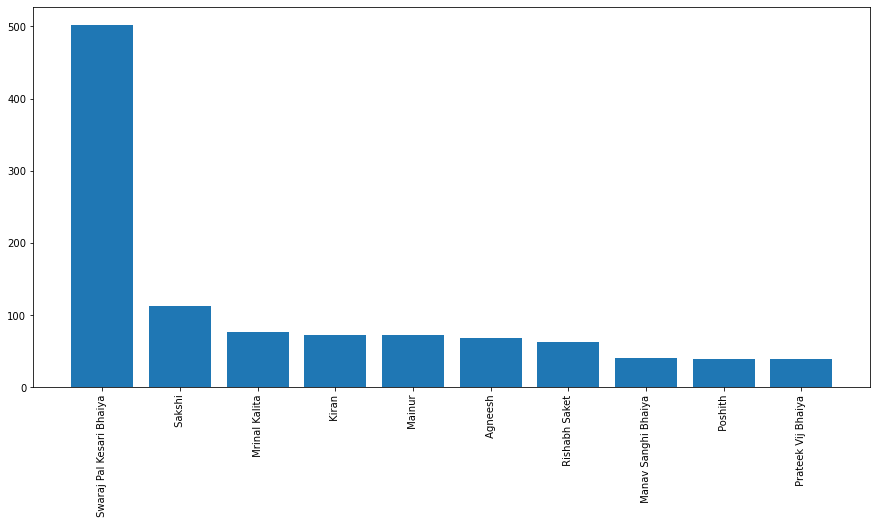

In [16]:
counts = df['User'].value_counts().head(10)
plt.figure(figsize=(15,7))
plt.bar(counts.index,counts.values)
plt.xticks(rotation = 'vertical')


In [17]:
# computationally heavy

wordmap = {}
for message in df['Message']:
    dummy = message.split()
    for word in dummy:
        if word in wordmap:
            wordmap[word]+=1
            
        else:
            wordmap[word] = 1
            
            
wordmap = dict(sorted(wordmap.items(),key = lambda x:x[1],reverse = True))

wordmap

{'bhaiya': 425,
 'the': 369,
 'to': 240,
 'and': 217,
 'I': 167,
 'Okay': 144,
 'of': 138,
 'Ok': 130,
 'a': 117,
 'you': 105,
 'for': 105,
 'Bhaiya': 99,
 'will': 97,
 'have': 88,
 'in': 86,
 'is': 84,
 'from': 74,
 'on': 73,
 'be': 71,
 'this': 65,
 'all': 61,
 'are': 57,
 'me': 54,
 'it': 52,
 'we': 50,
 'mail': 50,
 'with': 49,
 'not': 49,
 'as': 48,
 'them': 46,
 'call': 45,
 'Yes': 41,
 'was': 41,
 'by': 40,
 'that': 38,
 'your': 37,
 'need': 35,
 'contacts': 34,
 '<Media': 34,
 'omitted>': 34,
 'so': 33,
 'team': 32,
 'contact': 31,
 'they': 31,
 'This': 30,
 'am': 30,
 'make': 30,
 'tomorrow': 30,
 'update': 30,
 'hai': 30,
 'list': 28,
 "I'll": 28,
 'one': 28,
 'him': 28,
 'can': 27,
 'if': 27,
 'or': 26,
 'today': 26,
 'ka': 26,
 'work': 25,
 'marketing': 25,
 'guys': 25,
 'https': 25,
 'okay': 25,
 'he': 24,
 'do': 23,
 'after': 23,
 'no': 23,
 'my': 22,
 'but': 22,
 'people': 22,
 'our': 21,
 'sponsors': 21,
 'i': 21,
 'message': 21,
 'said': 21,
 'time': 20,
 'also': 20,
 

In [18]:
# top 20 words used in the whatsapp group

from collections import Counter
words = []
for message in df['Message']:
    words.extend(message.split())
    
wordmap = dict(Counter(words).most_common(20))
wordmap = dict(sorted(wordmap.items(),key=lambda x:x[1],reverse=True))
newdf = pd.DataFrame(wordmap.items())
newdf

,0,1
0,bhaiya,425
1,the,369
2,to,240
3,and,217
4,I,167
5,Okay,144
6,of,138
7,Ok,130
8,a,117
9,you,105


In [19]:
df = df[df['User'] != 'Group_notification']
df[(df['User'] == 'Group_notification')].shape

(0, 11)

In [20]:
def gettopwords(selecteduser,df):

    # getting the stopwords

    file = open('stop_hinglish.txt','r')
    stopwords = file.read()
    stopwords = stopwords.split('\n')
    
    if selecteduser!='Overall':
        df = df[df['User']==selecteduser]
        
    
    
    words = []
    
    for message in df['Message']:
        for word in message.lower().split():
            if word not in stopwords:
                words.append(word)
                
    
    mostcommon = pd.DataFrame(Counter(words).most_common(20))
    return mostcommon



mostcommon = gettopwords('Overall',df)

mostcommon

,0,1
0,bhaiya,503
1,mail,54
2,call,52
3,make,39
4,marketing,39
5,team,38
6,contact,38
7,contacts,34
8,<media,34
9,omitted>,34


In [21]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [22]:
import emoji
from collections import Counter
import pandas as pd

def emojihelp(selecteduser,df):
    
    if selecteduser!='Overall':
        df = df[df['User']==selecteduser]
        
    emojis = []
    for message in df['Message']:
        emojis.extend([c for c in message if c in emoji.EMOJI_DATA])
        
    
    emojidf = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))
    
    return emojidf


dfmoji = emojihelp('Overall',df)
dfmoji


,0,1
0,🙂,11
1,✨,9
2,🔥,9
3,🏻,8
4,🥳,4
5,❤,4
6,😂,4
7,💫,3
8,🙃,3
9,👍,3


In [23]:
dfmoji.columns = ['Emoji','Count']
dfmoji

,Emoji,Count
0,🙂,11
1,✨,9
2,🔥,9
3,🏻,8
4,🥳,4
5,❤,4
6,😂,4
7,💫,3
8,🙃,3
9,👍,3


In [24]:
def monthtimeline(selecteduser,df):


    temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index().sort_values(['Message'])
    
    time = []
    for i in range(temp.shape[0]):
        time.append(temp['Month'][i]+"-"+str(temp['Year'][i]))
        
    temp['Time'] = time
    
    return temp

In [25]:
df.head()

,Date,Time,User,Message,Month,Year,Month_num,Day,Day_name,Hour,Minute
4,10/06/2022,9:26pm,Swaraj Pal Kesari Bhaiya,@919678639378 add saare jinka list diya tha,June,2022,6,10,Friday,21,26
5,10/06/2022,9:27pm,Swaraj Pal Kesari Bhaiya,And jo srijan wali group mein respond kiye,June,2022,6,10,Friday,21,27
7,10/06/2022,9:27pm,Mrinal Kalita,Yes bhaiya,June,2022,6,10,Friday,21,27
13,11/06/2022,10:45am,Swaraj Pal Kesari Bhaiya,"Guys, I'll explain the work a little while la...",June,2022,6,11,Saturday,10,45
14,11/06/2022,11:38am,Kiran,"Hello everyone. Myself, Kiran Sarmah, from t...",June,2022,6,11,Saturday,11,38


In [26]:
temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index()
temp

,Year,Month_num,Month,Message
0,2022,6,June,171
1,2022,7,July,124
2,2022,8,August,317
3,2022,9,September,399
4,2022,10,October,304
5,2022,11,November,9
6,2022,12,December,12


In [27]:
temp1 = df['Day_name'].value_counts()
temp1

Tuesday      235
Monday       221
Saturday     215
Sunday       208
Wednesday    193
Thursday     148
Friday       116
Name: Day_name, dtype: int64

In [28]:
list(temp1.index)

['Tuesday', 'Monday', 'Saturday', 'Sunday', 'Wednesday', 'Thursday', 'Friday']

In [29]:
list(temp1.values)

[235, 221, 215, 208, 193, 148, 116]

In [30]:
temp2 = df['Month'].value_counts()
temp2

September    399
August       317
October      304
June         171
July         124
December      12
November       9
Name: Month, dtype: int64

In [31]:
list(temp2.index),list(temp2.values)

(['September', 'August', 'October', 'June', 'July', 'December', 'November'],
 [399, 317, 304, 171, 124, 12, 9])

In [32]:
%pip install --upgrade pip


%pip install --upgrade Pillow


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [33]:

%pip install --upgrade wordCloud

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


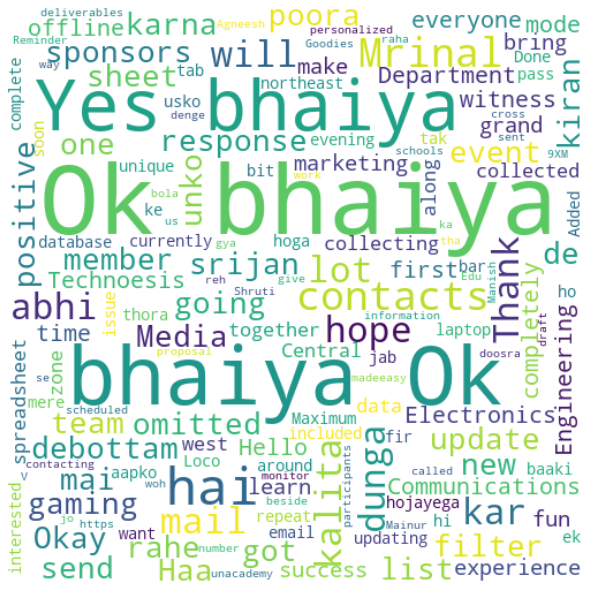

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

selected_user = ' Mrinal Kalita'
comment_words = ''
if selected_user != 'Overall':
    # Use str.strip() to remove leading and trailing whitespaces
    df_1 = df[df['User'] == selected_user]
#     for val in df_1['Message']:
     
#         # typecaste each val to string
#         val = str(val)

#         # split the value
#         tokens = val.split()

#         Converts each token into lowercase
#         for i in range(len(tokens)):
#             tokens[i] = tokens[i].lower()

#         comment_words += " ".join(tokens)+" "

#     wordcloud = WordCloud(width = 800, height = 800,
#                 background_color ='white',
#                 mode="RGB").generate_from_text(comment_words)
 
#     # plot the WordCloud image                       
#     plt.figure(figsize = (8, 8), facecolor = None)
#     plt.imshow(wordcloud)
#     plt.axis("off")
#     plt.tight_layout(pad = 0)

#     plt.show()

    wc = WordCloud(width=500, height=500,
                   min_font_size=10, background_color='white')

    df_wc = wc.generate_from_text(df_1['Message'].str.cat(sep=" "))

    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(df_wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)

    plt.show()




In [37]:
count = df['User'].value_counts().head()

newdf = pd.DataFrame((df['User'].value_counts()/df.shape[0])*100)
print(count)
newdf

 Swaraj Pal Kesari Bhaiya    502
 Sakshi                      113
 Mrinal Kalita                77
 Kiran                        73
 Mainur                       73
Name: User, dtype: int64


,User
Swaraj Pal Kesari Bhaiya,37.574850
Sakshi,8.458084
Mrinal Kalita,5.763473
Kiran,5.464072
Mainur,5.464072
Agneesh,5.089820
Rishabh Saket,4.715569
Manav Sanghi Bhaiya,3.068862
Poshith,2.994012
Prateek Vij Bhaiya,2.919162
